In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [6]:
# LES model with T equations

def Tab_plusx(a,b,S,pix,l):
    return (S-a-b)*((1-l)*pix + l*a/(S-1))

def Tab_plusy(a,b,S,piy,l):
    return (S-a-b)*((1-l)*piy + l*b/(S-1))

def Tab_minx(a,b,S,rx):
    return a*(rx + b/(S-1))

def Tab_miny(a,b,S,ry):
    return b*(ry + a/(S-1))

def prob_00(S,pix,piy,qx,qy,l):
    rx, ry = 1/qx, 1/qy
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * (S-j)/(j+1)*((1-l)*piy + l*j/(S-1))/ry
        sum1 += prod
    sum2 = 0
    for a in range(1,S+1):
        prod = 1
        for j in range(a):
            prod = prod * (S-j)/(j+1)*((1-l)*pix + l*j/(S-1))/rx
        sum3 = 0
        for b in range(S-a+1):
            prod1 = 1
            for k in range(b):
                prod1 = prod1 * ((S-a-k)*((S-1)*(1-l)*piy + l*k))/((k+1)*((S-1)*ry + a))
            sum3 += prod1
        sum2 += prod * (1 + sum3)
    return 1/(1 + sum1 + sum2)

# inclomplete formula!
def prob_00_v2(S,pix,piy,qx,qy,l):
    rx, ry = 1/qx, 1/qy
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * Tab_plusy(0,j,S,piy,l)/Tab_miny(0,j+1,S,ry)
        sum1 = sum1 + prod
    return sum1

def prob_ab(a,b,S,p00,pix,piy,qx,qy,l,which='Full'):
    # which = 'Full', 'A' or 'B'
    rx, ry = 1/qx, 1/qy
    prob_ab  = 0
    if which == 'Full' or which == 'A':
        # equation obtained for A
        prod1a, prod2a = 1, 1
        for j in range(a):
            prod1a = prod1a*Tab_plusx(j,0,S,pix,l)/Tab_minx(j+1,0,S,rx)
        for j in range(b):
            prod2a = prod2a*Tab_plusy(a,j,S,piy,l)/Tab_miny(a,j+1,S,ry)
        prob_ab += prod1a*prod2a
    if which == 'Full' or which == 'B':
        # equation obtained for B
        prod1b, prod2b = 1, 1
        for j in range(b):
            prod1b = prod1b*Tab_plusy(0,j,S,piy,l)/Tab_miny(0,j+1,S,ry)
        for j in range(a):
            prod2b = prod2b*Tab_plusx(j,b,S,pix,l)/Tab_minx(j+1,b,S,rx)
        prob_ab += prod1b*prod2b
    if which == 'Full':
        prob_ab = prob_ab/2
    prob_ab = p00*prob_ab
    return prob_ab

In [17]:
# Reina's noise type 1

def Tab_plusx_Rn1(a,b,S,qx,sigma):
    return (S-a-b)*(qx*a/(S-1) + sigma)

def Tab_plusy_Rn1(a,b,S,qy,sigma):
    return (S-a-b)*(qy*b/(S-1) + sigma)

def Tab_minx_Rn1(a,b,S,qy,sigma):
    return a*(sigma + qy*b/(S-1))

def Tab_miny_Rn1(a,b,S,qx,sigma):
    return b*(sigma + qx*a/(S-1))

def prob_00_Rn1(S,qx,qy,sigma):
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * Tab_plusy_Rn1(0,j,S,qy,sigma)/Tab_miny_Rn1(0,j+1,S,qx,sigma)
        sum1 = sum1 + prod
    sum2 = 0
    for a in range(1,S+1):
        prod = 1
        for j in range(a):
            prod = prod * Tab_plusx_Rn1(j,0,S,qx,sigma)/Tab_minx_Rn1(j+1,0,S,qy,sigma)
        sum3 = 0
        for b in range(S-a+1):
            prod1 = 1
            for k in range(b):
                prod1 = prod1 * Tab_plusy_Rn1(a,k,S,qy,sigma)/Tab_miny_Rn1(a,k+1,S,qx,sigma)
            sum3 += prod1
        sum2 += prod * (1 + sum3)
    return 1/(1 + sum1 + sum2)

def prob_ab_Rn1(a,b,S,p00,qx,qy,sigma, which='A'):
    prob_ab = 0
    if which == 'Full' or which == 'A':
        # equation obtained for A
        prod1a, prod2a = 1, 1
        for j in range(a):
            prod1a = prod1a*Tab_plusx_Rn1(j,0,S,qx,sigma)/Tab_minx_Rn1(j+1,0,S,qy,sigma)
        for j in range(b):
            prod2a = prod2a*Tab_plusy_Rn1(a,j,S,qy,sigma)/Tab_miny_Rn1(a,j+1,S,qx,sigma)
        prob_ab += prod1a*prod2a
    if which == 'Full' or which == 'B':
        # equation obtained for B
        prod1b, prod2b = 1, 1
        for j in range(b):
            prod1b = prod1b*Tab_plusy_Rn1(0,j,S,qy,sigma)/Tab_miny_Rn1(0,j+1,S,qx,sigma)
        for j in range(a):
            prod2b = prod2b*Tab_plusx_Rn1(j,b,S,qx,sigma)/Tab_minx_Rn1(j+1,b,S,qy,sigma)
        prob_ab += prod1b*prod2b
    if which == 'Full':
        prob_ab = prob_ab/2
    prob_ab = p00*prob_ab
    return prob_ab

In [2]:
# Reina's zealots

def Tab_plusx_Rz1(a,b,S,qx,Sz):
    return (S-a-b-2*Sz)*qx*(a+Sz)/(S-1)

def Tab_plusy_Rz1(a,b,S,qy,Sz):
    return (S-a-b-2*Sz)*qy*(b+Sz)/(S-1)

def Tab_minx_Rz1(a,b,S,qy,Sz):
    return a*qy*(b+Sz)/(S-1)

def Tab_miny_Rz1(a,b,S,qx,Sz):
    return b*qx*(a+Sz)/(S-1)

def prob_00_Rz1(S,qx,qy,Sz):
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * Tab_plusy_Rz1(0,j,S,qy,Sz)/Tab_miny_Rz1(0,j+1,S,qx,Sz)
        sum1 = sum1 + prod
    sum2 = 0
    for a in range(1,S+1):
        prod = 1
        for j in range(a):
            prod = prod * Tab_plusx_Rz1(j,0,S,qx,Sz)/Tab_minx_Rz1(j+1,0,S,qy,Sz)
        sum3 = 0
        for b in range(S-a+1):
            prod1 = 1
            for k in range(b):
                prod1 = prod1 * Tab_plusy_Rz1(a,k,S,qy,Sz)/Tab_miny_Rz1(a,k+1,S,qx,Sz)
            sum3 += prod1
        sum2 += prod * (1 + sum3)
    return 1/(1 + sum1 + sum2)

def prob_ab_Rz1(a,b,S,p00,qx,qy,Sz, which='A'):
    prob_ab = 0
    if which == 'Full' or which == 'A':
        # equation obtained for A
        prod1a, prod2a = 1, 1
        for j in range(a):
            prod1a = prod1a*Tab_plusx_Rz1(j,0,S,qx,Sz)/Tab_minx_Rz1(j+1,0,S,qy,Sz)
        for j in range(b):
            prod2a = prod2a*Tab_plusy_Rz1(a,j,S,qy,Sz)/Tab_miny_Rz1(a,j+1,S,qx,Sz)
        prob_ab += prod1a*prod2a
    if which == 'Full' or which == 'B':
        # equation obtained for B
        prod1b, prod2b = 1, 1
        for j in range(b):
            prod1b = prod1b*Tab_plusy_Rz1(0,j,S,qy,Sz)/Tab_miny_Rz1(0,j+1,S,qx,Sz)
        for j in range(a):
            prod2b = prod2b*Tab_plusx_Rz1(j,b,S,qx,Sz)/Tab_minx_Rz1(j+1,b,S,qy,Sz)
        prob_ab += prod1b*prod2b
    if which == 'Full':
        prob_ab = prob_ab/2
    prob_ab = p00*prob_ab
    return prob_ab

In [27]:
pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.6
S = 100
p00 = prob_00(S, *pis, *qs, l)
# fixed point:
fxp = [0.16648640741807813, 0.007958484989059489, 0.8255551075937357]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

fxp = [0.18540249757173186, 0.8052575146285746, 0.009339987799526717]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

fxp = [0.4826058780233375, 0.2665076242188334, 0.25088649775841443]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

pab = prob_ab(20, 20, S, p00, *pis, *qs, l)
print('Prob further from fxp: ', pab)

Prob in a fixed point with 0, 82: 0.0771024027954571
Prob in a fixed point with 80, 0: 1.0566467765889155e-05
Prob in a fixed point with 26, 25: 1.9419615484716407e-05
Prob further from fxp:  1.3359933809677643e-13


In [10]:
pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.6
S = 100
p00 = prob_00(S, *pis, *qs, l)

# fixed point:
# fxp = [0.16648640741807813, 0.007958484989059489, 0.8255551075937357]
# fxp = [0.4826058780233375, 0.2665076242188334, 0.25088649775841443]
fxp = [.18540249757173186, 0.8052575146285746, 0.009339987799526717]
a,b = int(S*fxp[1]), int(S*fxp[2])

for which in ['Full', 'A', 'B']:
    pab = prob_ab(a,b, S, p00, *pis, *qs, l, which)
    print(f'which = {which}, Pab = {pab}')


which = Full, Pab = 1.0566467765889149e-05
which = A, Pab = 1.0566467765889149e-05
which = B, Pab = 1.0566467765889149e-05


In [100]:
S, dS = 100, 1
Npoints = int(S/dS) + 1
xgrid, ygrid = np.mgrid[0:S:complex(0,Npoints), 0:S:complex(0,Npoints)]
probGrid = np.empty([Npoints, Npoints])

pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.9
# p00 = prob_00(S, *pis, *qs, l)
p00 = 1

for i,x in enumerate(xgrid[:,0]):
    for j,y in enumerate(ygrid[0,:]):
        if x+y<=S:
            probGrid[i,j] = prob_ab(int(x),int(y),S,p00, *pis, *qs, l, 'Full')
        else:
            # probGrid[i,j] = float('nan')
            probGrid[i,j] = np.nan

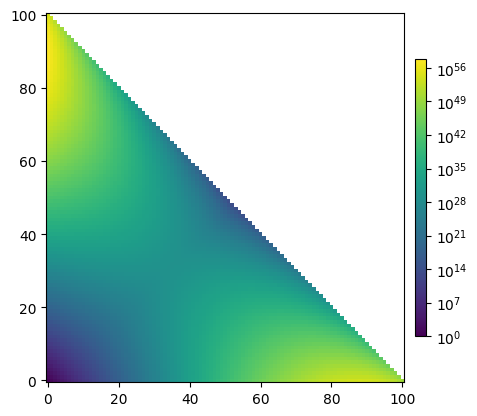

In [101]:
fig, ax = plt.subplots(figsize=(5.6,4.8))
vmin, vmax = min(probGrid[xgrid+ygrid<=S]), max(probGrid[xgrid+ygrid<=S])
# vmin = 1e-10
im = ax.pcolormesh(xgrid, ygrid, probGrid, cmap='viridis', shading='nearest', norm = LogNorm(vmin=vmin, vmax=vmax))
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)

In [102]:
# probGrid = probGrid[xgrid+ygrid<=S]

# prob1 = sum(probGrid[~np.isnan(probGrid)])
prob1 = sum(probGrid[xgrid+ygrid<=S])
prob11 = sum(probGrid[~np.isnan(probGrid)])
print(1/prob1, 1/prob11, prob_00(S, *pis, *qs, l))

probyArray = np.array(probGrid[ygrid > xgrid], dtype=np.float64)
proby = sum(probyArray[~np.isnan(probyArray)])
print(proby/prob1)

probxArray = np.array(probGrid[xgrid > ygrid], dtype=np.float64)
probx = sum(probxArray[~np.isnan(probxArray)])
print(probx/prob1)

1.4097371964323783e-59 1.4097371964323783e-59 1.496262274585159e-59
0.9999091229728478
9.087702715449365e-05


In [14]:
S = 50
pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.6
p00 = prob_00(S, *pis, *qs, l)

difs_probs = {}
for dif in range(S+1):
    # when a>=b:
    pairs_ab = [(a,a-dif) for a in range(dif,int((S+dif)/2)+1)]
    sum_same_dif = 0
    for a,b in pairs_ab:
        pab = prob_ab(a,b,S,p00,*pis,*qs,l, 'A')
        sum_same_dif += pab
    difs_probs[dif] = sum_same_dif
    # when b>a:
    if dif >=1:
        invdif = -dif
        sum_same_dif = 0
        for a,b in pairs_ab:
            pba = prob_ab(b,a,S,p00,*pis,*qs,l, 'A')
            sum_same_dif += pba
        difs_probs[invdif] = sum_same_dif

difs = sorted(difs_probs.keys())
probs = []
for d in difs:
    probs.append(difs_probs[d])

In [15]:
sum(probs)

0.9881911290863723

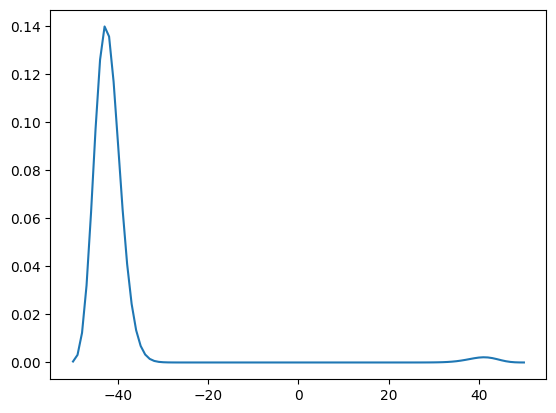

In [16]:
fig, ax = plt.subplots()
ax.plot(difs,probs)

# Reina's model with noise type 1

In [87]:
# Reina's
S, dS = 100, 1
Npoints = int(S/dS) + 1
xgrid, ygrid = np.mgrid[0:S:complex(0,Npoints), 0:S:complex(0,Npoints)]
probGrid = np.empty([Npoints, Npoints])

qs, sigma = [1.0, 1.05], 0.2
# p00 = prob_00_Rn1(S, *qs, sigma)
p00 = 1

for ik,x in enumerate(xgrid[:,0]):
    for jk,y in enumerate(ygrid[0,:]):
        if x+y<=S:
            probGrid[ik,jk] = prob_ab_Rn1(int(x),int(y),S,p00, *qs, sigma, 'A')
        else:
            # probGrid[i,j] = float('nan')
            probGrid[ik,jk] = np.nan
            

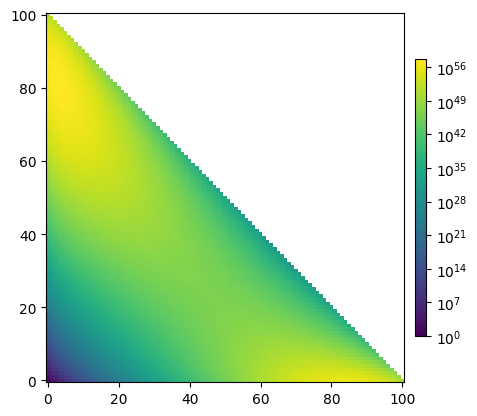

In [84]:
fig, ax = plt.subplots(figsize=(5.6,4.8))
vmin, vmax = min(probGrid[xgrid+ygrid<=S]), max(probGrid[xgrid+ygrid<=S])
# vmin = 1e-10
# print(vmin, vmax)
im = ax.pcolormesh(xgrid, ygrid, probGrid, cmap='viridis', shading='nearest', norm = LogNorm(vmin=vmin, vmax=vmax))
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)

In [78]:
probNorm= sum(probGrid[~np.isnan(probGrid)])
print(probNorm)

4.841649280209275e+76


In [88]:
prob1 = sum(probGrid[xgrid+ygrid<=S])
prob11 = sum(probGrid[~np.isnan(probGrid)])
print(1/prob1, 1/prob11, prob_00_Rn1(S, *qs, sigma))

probyArray = np.array(probGrid[ygrid > xgrid], dtype=np.float64)
proby = sum(probyArray[~np.isnan(probyArray)])
print(proby/prob1)

probxArray = np.array(probGrid[xgrid > ygrid], dtype=np.float64)
probx = sum(probxArray[~np.isnan(probxArray)])
print(probx/prob1)

2.0713529762059282e-59 2.0713529762059282e-59 2.0319968278515262e-59
0.3122830307163429
0.6877169691679008


### prob x-y=k

In [103]:
S = 200
qs, sigma = [1.0, 1.0], 0.1
# p00 = prob_00_Rn1(S, *qs, sigma)
p00 = 1

which = 'A'
difs_probs = {}
for dif in range(S+1):
    # when a>=b:
    pairs_ab = [(a,a-dif) for a in range(dif,int((S+dif)/2)+1)]
    sum_same_dif = 0
    for a,b in pairs_ab:
        pab = prob_ab_Rn1(a,b,S,p00,*qs,sigma, which)
        sum_same_dif += pab
    difs_probs[dif] = sum_same_dif
    # when b>a:
    if dif >=1:
        invdif = -dif
        sum_same_dif = 0
        for a,b in pairs_ab:
            pba = prob_ab_Rn1(b,a,S,p00,*qs,sigma, which)
            sum_same_dif += pba
        difs_probs[invdif] = sum_same_dif

difs = sorted(difs_probs.keys())
probs = []
for d in difs:
    probs.append(difs_probs[d])

print(sum(probs))
probs = np.array(probs)/sum(probs)

6.335718084847033e+150


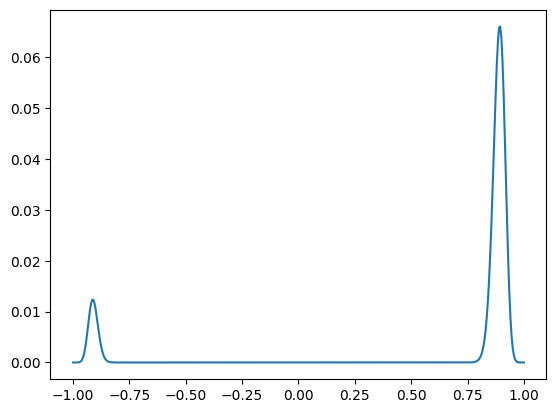

In [104]:
fig, ax = plt.subplots()
difsNorm = np.array(difs)/S
ax.plot(difsNorm,probs)

### Reina's model with zealots

In [20]:
S = 200
qs, Sz = [1.05, 1.0], int((S/2)*0.35)
# p00 = prob_00_Rz1(S, *qs, Sz)
p00 = 1

which = 'Full'
difs_probs = {}
for dif in range(S+1):
    # when a>=b:
    pairs_ab = [(a,a-dif) for a in range(dif,int((S-2*Sz+dif)/2)+1)]
    sum_same_dif = 0
    for a,b in pairs_ab:
        pab = prob_ab_Rz1(a,b,S,p00,*qs,Sz, which)
        sum_same_dif += pab
    difs_probs[dif] = sum_same_dif
    # when b>a:
    if dif >=1:
        invdif = -dif
        sum_same_dif = 0
        for a,b in pairs_ab:
            pba = prob_ab_Rz1(b,a,S,p00,*qs,Sz, which)
            sum_same_dif += pba
        difs_probs[invdif] = sum_same_dif

difs = sorted(difs_probs.keys())
probs = []
for d in difs:
    probs.append(difs_probs[d])

print(sum(probs))
probs = np.array(probs)/sum(probs)

1.1206421598443253e+71


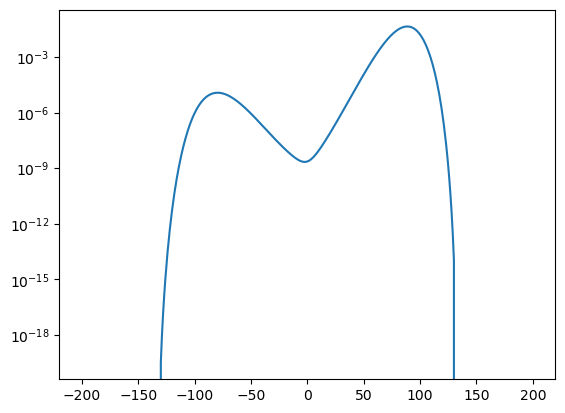

In [21]:
fig, ax = plt.subplots()
ax.set_yscale('log')
# ax.set_xlim(-1,1)
# ax.set_xscale('symlog')
difsNorm = np.array(difs)/S
ax.plot(difs,probs)

In [14]:
S = 20
Sz = int((S/2)*0.2)
print(S, Sz)
for dif in range(S+1):
    # when a>=b:
    pairs_ab = [(a,a-dif) for a in range(dif,int((S-2*Sz+dif)/2)+1)]
    print(pairs_ab)

20 2
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7)]
[(2, 0), (3, 1), (4, 2), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7)]
[(3, 0), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5), (9, 6)]
[(4, 0), (5, 1), (6, 2), (7, 3), (8, 4), (9, 5), (10, 6)]
[(5, 0), (6, 1), (7, 2), (8, 3), (9, 4), (10, 5)]
[(6, 0), (7, 1), (8, 2), (9, 3), (10, 4), (11, 5)]
[(7, 0), (8, 1), (9, 2), (10, 3), (11, 4)]
[(8, 0), (9, 1), (10, 2), (11, 3), (12, 4)]
[(9, 0), (10, 1), (11, 2), (12, 3)]
[(10, 0), (11, 1), (12, 2), (13, 3)]
[(11, 0), (12, 1), (13, 2)]
[(12, 0), (13, 1), (14, 2)]
[(13, 0), (14, 1)]
[(14, 0), (15, 1)]
[(15, 0)]
[(16, 0)]
[]
[]
[]
[]
